**CNN Model**

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load and preprocess the MNIST dataset

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1

mnist_train_images, mnist_test_images = mnist_train_images/255.0, mnist_test_images/255.0

In [4]:
# Reshape images to include channel dimension

mnist_train_images = mnist_train_images.reshape((60000, 28, 28, 1))
mnist_test_images = mnist_test_images.reshape((10000, 28, 28, 1))

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a function that displays images as a plot of pixels
def plot_first_10_digits(images, labels):
    plt.figure(figsize=(12,4)) # Adjusted figure size for better layout
    for i in range(10):
        plt.subplot(2, 5,  i+1) # 2 rows, 5 columns
        plt.imshow(images[i].reshape(28, 28), cmap = 'gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()    

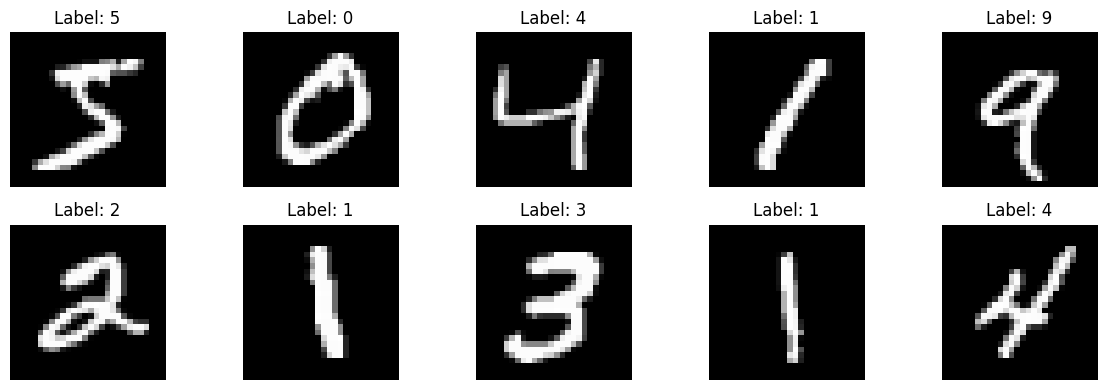

In [6]:
# Display the first 10 images present in the MNIST dataset
plot_first_10_digits(mnist_train_images, mnist_train_labels)

In [7]:
# Define the CNN model to train on the MNIST dataset

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\Yadu Krishnan\project\jupes_kernel\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model

cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Define Early stopping and learning rate reduction callbacks to prevent model from overfitting

mnist_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

mnist_lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    verbose=1,
    mode='min',
    min_lr=1e-6
)

# Train the model

cnn_model.fit(mnist_train_images, mnist_train_labels, epochs=20, batch_size=64, validation_split=0.2, callbacks= [mnist_early_stopping, mnist_lr_scheduler])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8568 - loss: 0.4696 - val_accuracy: 0.9768 - val_loss: 0.0761 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9814 - loss: 0.0594 - val_accuracy: 0.9875 - val_loss: 0.0479 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9872 - loss: 0.0383 - val_accuracy: 0.9864 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9906 - loss: 0.0282 - val_accuracy: 0.9861 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 5/20
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9924 - loss: 0.0229
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9864 - val_loss: 0.0469 - learning_rate: 0.0010
Epoch 5: early stopping
Restoring model weights from the end of the best epoc

In [9]:
# Evaluate the CNN model

mnist_test_loss, mnist_test_acc = cnn_model.evaluate(mnist_test_images, mnist_test_labels, verbose=2)
print(f'\nTest accuracy: {mnist_test_acc}')

313/313 - 2s - 5ms/step - accuracy: 0.9881 - loss: 0.0357

Test accuracy: 0.988099992275238


Faces: Age detection from Images

In [10]:
# Download the dataset
import kagglehub
path = kagglehub.dataset_download("arashnic/faces-age-detection-dataset")

print("Path to dataset files:", path)

c:\Users\Yadu Krishnan\project\jupes_kernel\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Yadu Krishnan\.cache\kagglehub\datasets\arashnic\faces-age-detection-dataset\versions\2


In [11]:
# Load the data
import pandas as pd
face_data = pd.read_csv(f'{path}/faces/train.csv')

# Display the first few rows of the dataset
face_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


<Axes: >

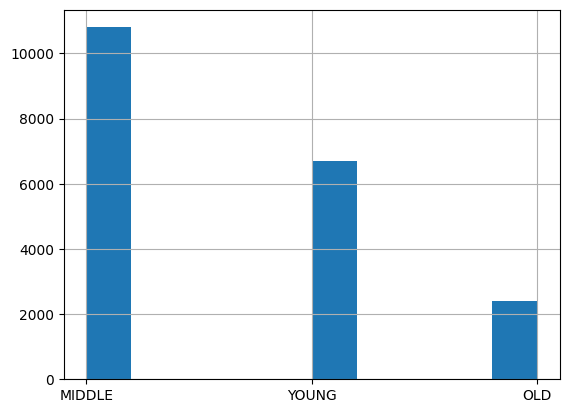

In [12]:
# Print out a histogram for class distribution
face_data['Class'].hist()

In [13]:
# Create file paths

directory = path + '/faces/Train/'
face_data['file_path'] = directory + face_data['ID']


# Create a new dataframe from the data

face_df = face_data[['file_path', 'Class']].rename(columns={'Class':'label'})


# Check class distribution before splitting

print("Class distribution before splitting:")
print(face_df['label'].value_counts())

Class distribution before splitting:
label
MIDDLE    10804
YOUNG      6706
OLD        2396
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Creating a function that displays facial images from the dataset folder
def plot_first_10_face_images(face_df):
    plt.figure(figsize=(12,4))
    for i in range(10):
        if i < len(face_df):
            # Get the file path and label
            img_path = face_df['file_path'].iloc[i]
            label = face_df['label'].iloc[i]

            # Open and convert the image
            img = Image.open(img_path).convert('RGB')

            # Plot the image
            plt.subplot(2, 5, i+1)
            plt.imshow(img)
            plt.title(f"Label: {label}")
            plt.axis('off')

        else:
            break
    plt.tight_layout()
    plt.show()    

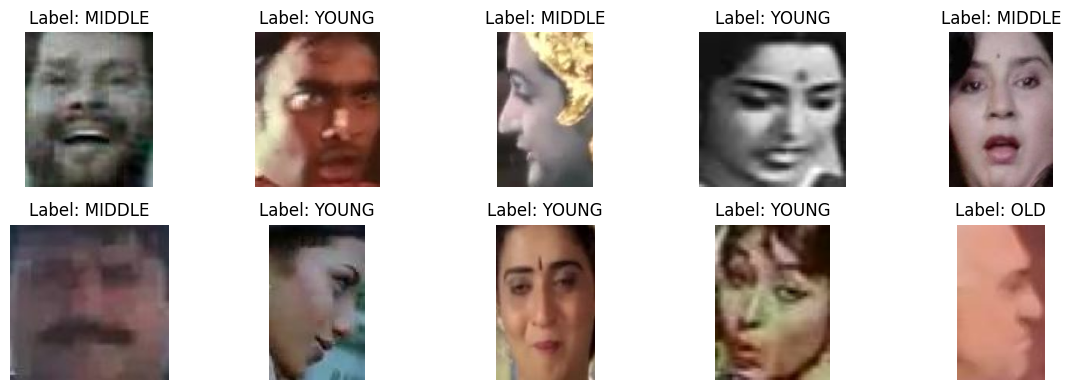

In [15]:
plot_first_10_face_images(face_df)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%), validation (10%), and test (10%) sets

train_data, temp_data = train_test_split(face_df, train_size=0.8, shuffle=True, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=True, random_state=42)


# Print the number of images in each dataset

print(f"Number of images in the Training dataset: {train_data.shape[0]}")
print(f"Number of images in the Validation dataset: {valid_data.shape[0]}")
print(f"Number of images in the Testing dataset: {test_data.shape[0]}")


# Check class distribution in train_data

print("Class distribution in the Training data:")
print(train_data['label'].value_counts())

Number of images in the Training dataset: 15924
Number of images in the Validation dataset: 1991
Number of images in the Testing dataset: 1991
Class distribution in the Training data:
label
MIDDLE    8623
YOUNG     5376
OLD       1925
Name: count, dtype: int64


In [17]:
# Convert integer labels to strings for the data generators

train_data['label'] = train_data['label'].astype(str)
valid_data['label'] = valid_data['label'].astype(str)
test_data['label'] = test_data['label'].astype(str)

In [18]:
# Augmenting data by adding images to enhance the training process in the Training data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight


train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    # shear_range=0.2,
    zoom_range=0.15
)

# Validation generator without augmentation
valid_test_gen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32 #This can be updated to get better accuracy

# Calculate class weights 
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_data['label']),
    y=train_data['label']
)
class_weight_dict = dict(enumerate(class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(0.615563029108199), 1: np.float64(2.7574025974025975), 2: np.float64(0.9873511904761905)}


In [20]:
# Create data generators
print("Generating Training Dataset")
train_ds = train_gen.flow_from_dataframe(
    dataframe=train_data,
    x_col='file_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Generating Validation Dataset")
validation_ds = valid_test_gen.flow_from_dataframe(
    dataframe=valid_data,
    x_col='file_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Generating Testing Dataset")
test_ds = valid_test_gen.flow_from_dataframe(
    dataframe=test_data,
    x_col='file_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


# Display Category mapping
print("Category mapping:", train_ds.class_indices)

Generating Training Dataset
Found 15924 validated image filenames belonging to 3 classes.
Generating Validation Dataset
Found 1991 validated image filenames belonging to 3 classes.
Generating Testing Dataset
Found 1991 validated image filenames belonging to 3 classes.
Category mapping: {'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}


In [42]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Use a pre-trained ResNet50V2 as the base model
resnet_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Print number of layers in resnet base model
print('Number of layers in the Resnet base model:', len(resnet_base.layers))

Number of layers in the Resnet base model: 190


In [38]:
# Freeze the first 140 layers
for layer in resnet_base.layers[:140]:
    layer.trainable = False

# Unfreeze the remaining layers
for layer in resnet_base.layers[140:]:
    layer.trainable = True

resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.3),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(3, activation = 'softmax')
])

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate reduction callback on the validation loss metric
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Early stopping callback on validation loss metric to prevent overfitting
face_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
steps_per_epoch = len(train_ds)
validation_steps = len(validation_ds)
test_steps = len(test_ds)

# Train the model
history = resnet_model.fit(
    train_ds,
    epochs=30,
    validation_data=validation_ds,
    callbacks=[reduce_lr, face_early_stopping],
    class_weight=class_weight_dict
)

c:\Users\Yadu Krishnan\project\jupes_kernel\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1196s 2s/step - accuracy: 0.5297 - loss: 0.9469 - val_accuracy: 0.6434 - val_loss: 0.9669 - learning_rate: 0.0010
Epoch 2/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1168s 2s/step - accuracy: 0.6844 - loss: 0.6637 - val_accuracy: 0.7157 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 3/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1163s 2s/step - accuracy: 0.7365 - loss: 0.5637 - val_accuracy: 0.6685 - val_loss: 0.7774 - learning_rate: 0.0010
Epoch 4/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1157s 2s/step - accuracy: 0.7592 - loss: 0.5094 - val_accuracy: 0.7931 - val_loss: 0.5089 - learning_rate: 0.0010
Epoch 5/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1145s 2s/step - accuracy: 0.7959 - loss: 0.4423 - val_accuracy: 0.7911 - val_loss: 0.5444 - learning_rate: 0.0010
Epoch 6/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1140s 2s/step - accuracy: 0.8182 - loss: 0.3905 - val_accuracy: 0.7690 - val_loss: 0.5544 - learning_rate: 0.0010
Epoch 6: early stopping
Restoring model weights from the end of the best epo

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Evaluation
y_true = test_data['label']
y_pred = resnet_model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert string labels to numeric
label_to_index = {v: k for k, v in test_ds.class_indices.items()}
y_true_numeric = y_true.map(label_to_index)

# Replace NaN values with a placeholder (e.g., -1)
y_true_numeric = y_true_numeric.fillna(-1).astype(int)

# Ensure y_true_numeric and y_pred_classes have the same length
y_true_numeric = y_true_numeric[:len(y_pred_classes)]

# Calculate metrics
accuracy = accuracy_score(y_true_numeric, y_pred_classes)
precision = precision_score(y_true_numeric, y_pred_classes, average='weighted')
recall = recall_score(y_true_numeric, y_pred_classes, average='weighted')
f1 = f1_score(y_true_numeric, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


C:\Users\Yadu Krishnan\AppData\Local\Temp\ipykernel_14292\2251173787.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_true_numeric = y_true_numeric.fillna(-1).astype(int)
c:\Users\Yadu Krishnan\project\jupes_kernel\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yadu Krishnan\project\jupes_kernel\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _war

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_model(model, test_ds):
   
    # Reset test generator
    test_ds.reset()
    
    # Get generator's ordering and class mapping
    filenames = test_ds.filenames
    class_indices = test_ds.class_indices
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # If test_data is provided, use it to match filenames
    if test_data is not None:
        # Create a lookup dictionary from filepath to label
        filepath_to_label = dict(zip(test_data['file_path'], test_data['label']))
        
        # Get true labels in generator's order
        y_true = []
        for filename in filenames:
            # Try to find this filename in our lookup dictionary
            for file_path in filepath_to_label:
                if filename in file_path:
                    y_true.append(filepath_to_label[file_path])
                    break
            else:
                # If no match found
                y_true.append(None)
    else:
        # If no test_data provided, use class indices from generator
        y_true = [index_to_class[idx] for idx in test_ds.classes]
    
    # Get predictions
    y_pred = model.predict(test_ds)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Convert labels to numeric using same mapping
    y_true_numeric = np.array([class_indices.get(label, -1) for label in y_true if label is not None])
    y_pred_numeric = y_pred_classes[:len(y_true_numeric)]
    
    # Keep only valid samples
    valid_indices = y_true_numeric != -1
    y_true_numeric = y_true_numeric[valid_indices]
    y_pred_numeric = y_pred_numeric[valid_indices]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_true_numeric, y_pred_numeric),
        'precision': precision_score(y_true_numeric, y_pred_numeric, average='weighted', zero_division=0),
        'recall': recall_score(y_true_numeric, y_pred_numeric, average='weighted', zero_division=0),
        'f1_score': f1_score(y_true_numeric, y_pred_numeric, average='weighted', zero_division=0)
    }
    
    # Print metrics
    for name, value in metrics.items():
        print(f"{name.title()}: {value:.4f}")
    
    # Create confusion matrix
    cm = confusion_matrix(y_true_numeric, y_pred_numeric)
    plt.figure(figsize=(8, 6))
    tick_labels = [index_to_class[i] for i in sorted(np.unique(y_true_numeric))]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=tick_labels, yticklabels=tick_labels)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    return metrics

63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step
Accuracy: 0.7735
Precision: 0.7847
Recall: 0.7735
F1_Score: 0.7734


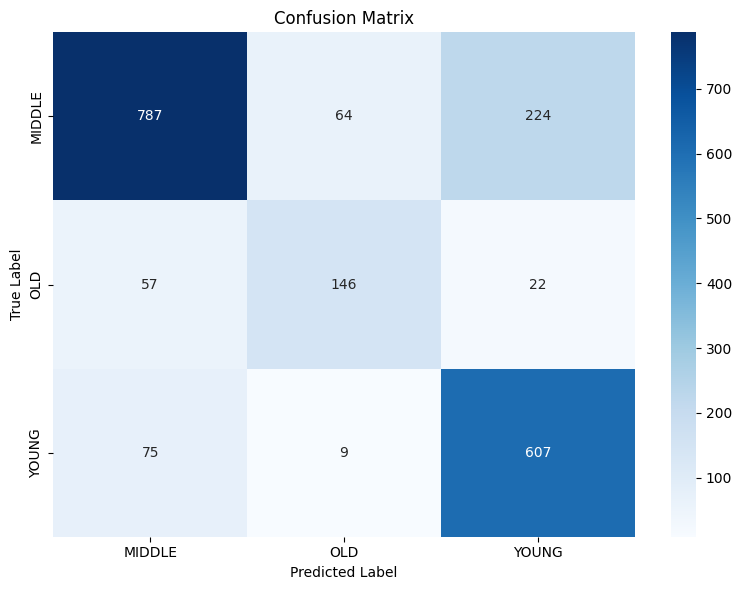

{'accuracy': 0.7734806629834254,
 'precision': 0.7846875179986568,
 'recall': 0.7734806629834254,
 'f1_score': 0.7734082678428856}

In [27]:
evaluate_model(resnet_model, test_ds)

In [43]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

# Use a pre-trained VGG16 as a base model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Print the number of layers in VGG base model
print('Number of layers in the VGG base model:', len(vgg_base.layers))

Number of layers in the VGG base model: 19


In [40]:
# Freeze the first 15 layers
for layer in vgg_base.layers[:15]:
    layer.trainable = False

# Unfreeze the remaining layers
for layer in vgg_base.layers[15:]:
    layer.trainable = True

vgg_model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate reduction callback on the validation loss metric
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Early stopping callback on validation loss metric to prevent overfitting
face_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
steps_per_epoch = len(train_ds)
validation_steps = len(validation_ds)
test_steps = len(test_ds)

# Train the model
history = vgg_model.fit(
    train_ds,
    epochs=30,
    validation_data=validation_ds,
    callbacks=[reduce_lr, face_early_stopping],
    class_weight=class_weight_dict
)

Epoch 1/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1735s 3s/step - accuracy: 0.3952 - loss: 1.0957 - val_accuracy: 0.1236 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 2/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1711s 3s/step - accuracy: 0.4419 - loss: 1.0852 - val_accuracy: 0.1236 - val_loss: 1.1070 - learning_rate: 0.0010
Epoch 3/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1725s 3s/step - accuracy: 0.3009 - loss: 1.0944 - val_accuracy: 0.1236 - val_loss: 1.1030 - learning_rate: 0.0010
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


63/63 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step
Accuracy: 0.1130
Precision: 0.0128
Recall: 0.1130
F1_Score: 0.0229


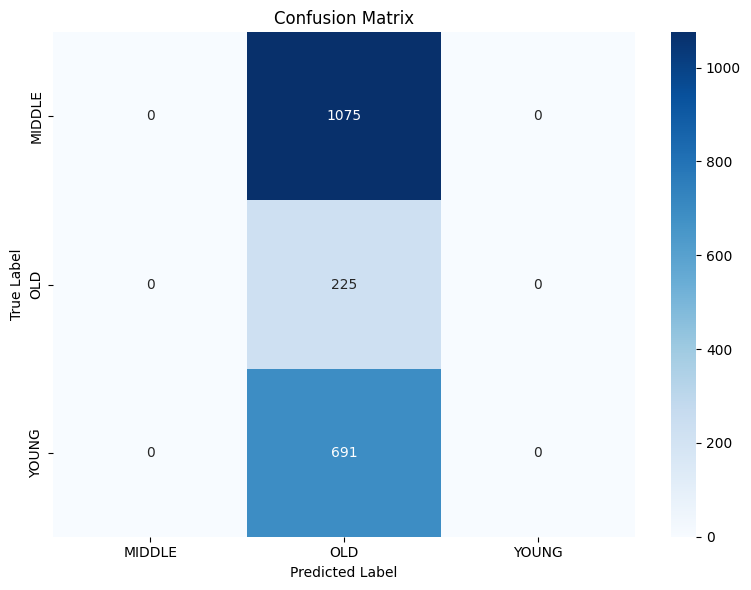

{'accuracy': 0.11300853842290307,
 'precision': 0.012770929756480759,
 'recall': 0.11300853842290307,
 'f1_score': 0.022948484788044395}

In [32]:
evaluate_model(vgg_model, test_ds)

In [44]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

# Use a pre-trained Xception as a base model
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Print the number of layers in VGG base model
print('Number of layers in the Xception base model:', len(xception_base.layers))


Number of layers in the Xception base model: 132


In [45]:
# Freeze the first 116 layers (Xception has 132 layers)
for layer in xception_base.layers[:116]:
    layer.trainable = False

# Unfreeze the remaining layers
for layer in xception_base.layers[116:]:
    layer.trainable = True

xception_model = Sequential([
    xception_base,
    GlobalAveragePooling2D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(3, activation = 'softmax')
])

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
xception_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate reduction callback on the validation loss metric
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Early stopping callback on validation loss metric to prevent overfitting
face_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
steps_per_epoch = len(train_ds)
validation_steps = len(validation_ds)
test_steps = len(test_ds)

# Train the model
history = xception_model.fit(
    train_ds,
    epochs=30,
    validation_data=validation_ds,
    callbacks=[reduce_lr, face_early_stopping],
    class_weight=class_weight_dict
)

Epoch 1/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1397s 3s/step - accuracy: 0.4964 - loss: 0.9266 - val_accuracy: 0.5756 - val_loss: 1.4322 - learning_rate: 0.0010
Epoch 2/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1385s 3s/step - accuracy: 0.6896 - loss: 0.6579 - val_accuracy: 0.6811 - val_loss: 0.7773 - learning_rate: 0.0010
Epoch 3/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1383s 3s/step - accuracy: 0.7406 - loss: 0.5537 - val_accuracy: 0.6991 - val_loss: 0.7524 - learning_rate: 0.0010
Epoch 4/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1382s 3s/step - accuracy: 0.7857 - loss: 0.4774 - val_accuracy: 0.8091 - val_loss: 0.4905 - learning_rate: 0.0010
Epoch 5/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1378s 3s/step - accuracy: 0.8213 - loss: 0.3994 - val_accuracy: 0.7092 - val_loss: 0.6270 - learning_rate: 0.0010
Epoch 6/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1606s 3s/step - accuracy: 0.8374 - loss: 0.3463 - val_accuracy: 0.8242 - val_loss: 0.4421 - learning_rate: 0.0010
Epoch 7/30
498/498 ━━━━━━━━━━━━━━━━━━━━ 1380s 3s/step - accuracy: 0.8667 - l

63/63 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step
Accuracy: 0.8282
Precision: 0.8336
Recall: 0.8282
F1_Score: 0.8299


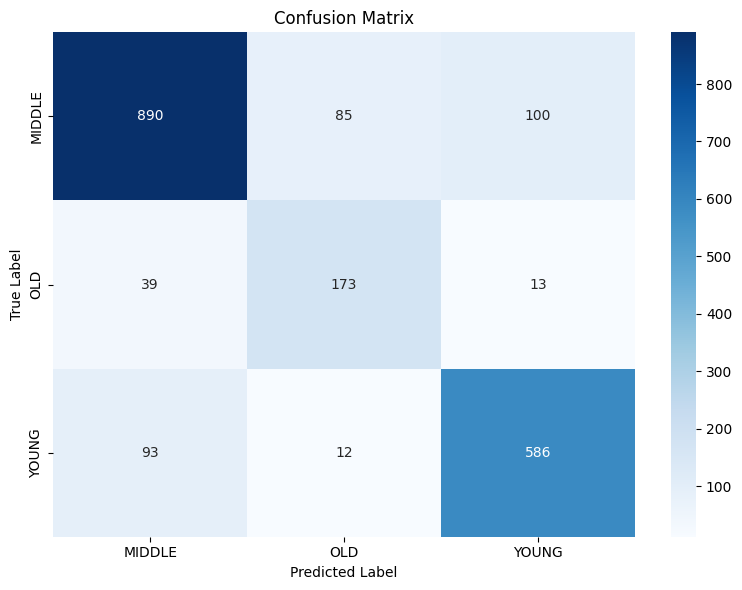

{'accuracy': 0.8282270215971873,
 'precision': 0.8335582830744477,
 'recall': 0.8282270215971873,
 'f1_score': 0.8299317451058286}

In [35]:
evaluate_model(xception_model, test_ds)